In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/description.txt
/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data_solution.txt
/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data.txt
/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt


In [2]:
train_path = '/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt'

train_data = pd.read_csv(train_path, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')

In [3]:
train_data = train_data.sample(n=5000, random_state=42).reset_index(drop=True)

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        5000 non-null   object
 1   Genre        5000 non-null   object
 2   Description  5000 non-null   object
dtypes: object(3)
memory usage: 117.3+ KB


In [14]:
train_data.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [15]:
test_path = '/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data.txt'
test_data = pd.read_csv(test_path, sep=':::', names=['ID', 'Genre', 'Description'], engine='python')

In [16]:
test_data = test_data.sample(n=5000, random_state=42).reset_index(drop=True)

## EDA

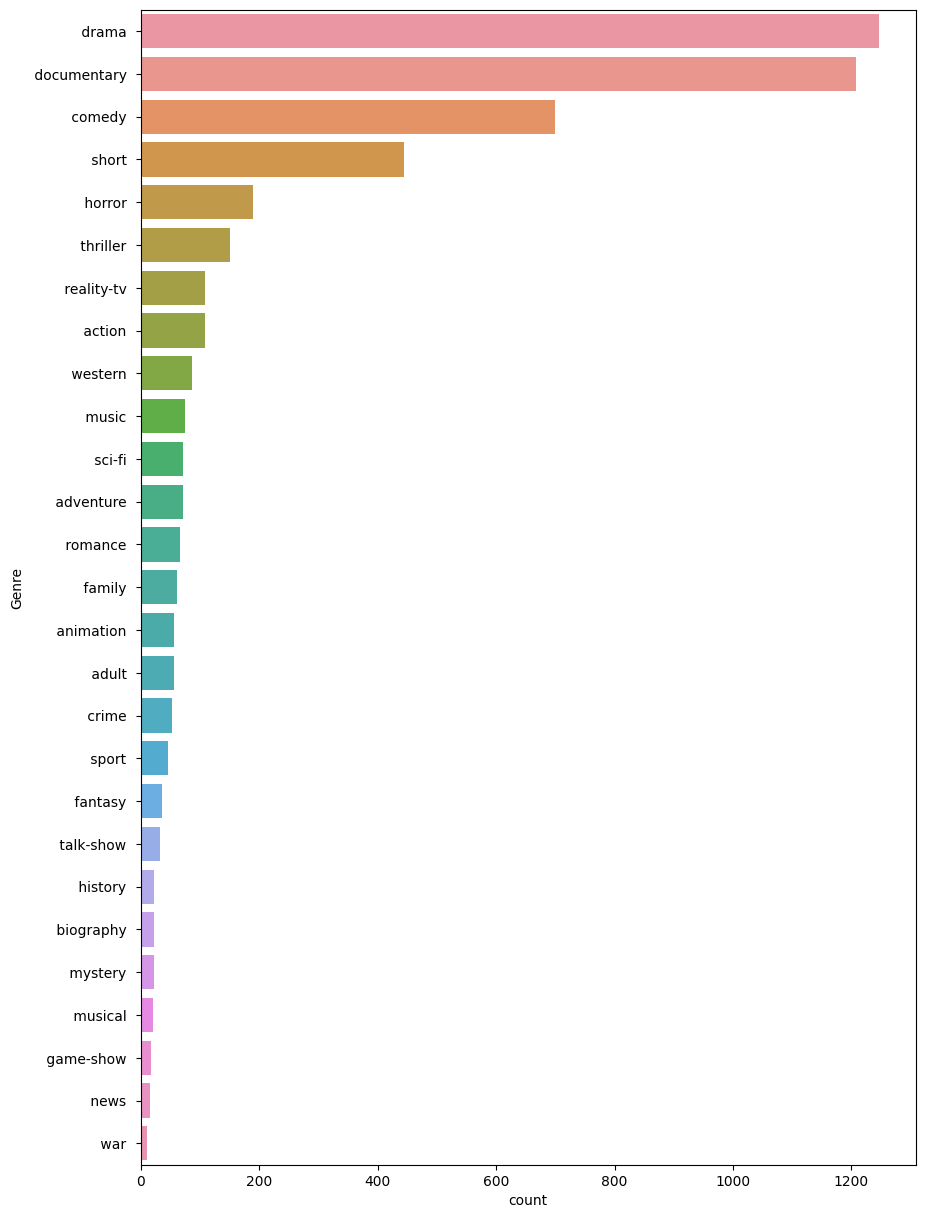

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 15))
sns.countplot(data=train_data, y="Genre", order=train_data["Genre"].value_counts().index)
plt.show()


## Data Preprocesing

In [18]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer

# Make sure required NLTK data is downloaded   use dont download this nltk.But, you working with local most download this.
# nltk.download('punkt')
# nltk.download('stopwords')

# Initialize
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

def cleaning_data(text):
    text = text.lower()
    text = re.sub(r'@\w+', '', text)              # Remove @mentions
    text = re.sub(r'http\S+', '', text)           # Remove URLs
    text = re.sub(r'pic\.twitter\.com/\S+', '', text)  # Remove Twitter pic links
    text = re.sub(r'[^a-z\s]', '', text)          # Keep only letters and spaces
    text = re.sub(r'\s+', ' ', text).strip()      # Remove extra spaces

    words = nltk.word_tokenize(text)
    words = [stemmer.stem(word) for word in words if word not in stop_words and len(word) > 2]

    return " ".join(words)


In [19]:
train_data["TextCleaning"] = train_data["Description"].apply(cleaning_data)
test_data["TextCleaning"] = test_data["Description"].apply(cleaning_data)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vector = TfidfVectorizer(max_features=5000, stop_words='english')

In [21]:
X_train  = vector.fit_transform(train_data["TextCleaning"]) 
X_test = vector.fit_transform(test_data["TextCleaning"]) 

In [22]:
X = X_train
y = train_data["Genre"]

In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


In [24]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [26]:
model.score(X_train, y_train)

0.8595

In [28]:
y_pred = model.predict(X_test)
y_pred

array([' drama ', ' documentary ', ' drama ', ' drama ', ' drama ',
       ' documentary ', ' drama ', ' documentary ', ' drama ', ' comedy ',
       ' drama ', ' drama ', ' drama ', ' documentary ', ' drama ',
       ' documentary ', ' documentary ', ' documentary ', ' comedy ',
       ' drama ', ' documentary ', ' documentary ', ' drama ',
       ' documentary ', ' drama ', ' documentary ', ' drama ',
       ' documentary ', ' documentary ', ' drama ', ' documentary ',
       ' documentary ', ' documentary ', ' comedy ', ' documentary ',
       ' drama ', ' drama ', ' drama ', ' comedy ', ' drama ', ' drama ',
       ' drama ', ' documentary ', ' documentary ', ' drama ',
       ' documentary ', ' drama ', ' documentary ', ' drama ',
       ' documentary ', ' documentary ', ' documentary ', ' comedy ',
       ' drama ', ' drama ', ' drama ', ' drama ', ' documentary ',
       ' documentary ', ' documentary ', ' drama ', ' documentary ',
       ' drama ', ' drama ', ' drama ', ' docum

In [38]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)

print("Validation Accuracy:", accuracy)
print(classification_report(y_test, y_pred,zero_division=0))


Validation Accuracy: 0.432
               precision    recall  f1-score   support

      action        0.00      0.00      0.00        25
       adult        0.00      0.00      0.00        13
   adventure        0.00      0.00      0.00        13
   animation        0.00      0.00      0.00         6
   biography        0.00      0.00      0.00         2
      comedy        0.44      0.18      0.25       154
       crime        0.00      0.00      0.00        13
 documentary        0.56      0.85      0.68       245
       drama        0.34      0.85      0.49       228
      family        1.00      0.08      0.14        13
     fantasy        0.00      0.00      0.00         7
   game-show        0.00      0.00      0.00         4
     history        0.00      0.00      0.00         6
      horror        0.50      0.02      0.04        44
       music        0.00      0.00      0.00        16
     musical        0.00      0.00      0.00         3
     mystery        0.00      0.00   